In [48]:
# Included libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [49]:
# Load CSV
df = pd.read_csv("../data/MarketData.csv", header=[3,4,5,6])
df.columns = df.columns.get_level_values(1) # Truncate to 1 header
df.rename(columns={df.columns[0]:"Dates"}, inplace=True) # This is a bit inefficient as this name exists in level 0...
df.head(5) # Not sure about the first 2 rows containing date range for this file...

,Dates,LMCADS03 Comdty,LMAHDS03 Comdty,LMZSDS03 Comdty,LMPBDS03 Comdty,LMSNDS03 Comdty,CL1 Comdty
0,01/01/2010,7375.0,2230.0,2560.0,2432.0,16950,79.36
1,04/01/2010,7500.0,2267.0,2574.0,2515.0,17450,81.51
2,05/01/2010,7485.0,2302.0,2575.0,2522.5,17375,81.77
3,06/01/2010,7660.0,2377.0,2718.0,2680.0,17825,83.18
4,07/01/2010,7535.0,2310.0,2607.0,2599.0,17475,82.66


In [50]:
# Filter all data except 2021 Zinc and Copper
df = df[['Dates', 'LMCADS03 Comdty', 'LMZSDS03 Comdty']]
df['Dates'] = pd.to_datetime(df['Dates'], format="%d/%m/%Y") # Convert to pd datetime friendly format
df = df[(df['Dates'] > '2020-12-31') & (df['Dates'] < '2022-01-01')]
df = df.reset_index(drop=True) # Reset index after truncation
df.tail(5)

,Dates,LMCADS03 Comdty,LMZSDS03 Comdty
256,2021-12-27,9568.0,3519.0
257,2021-12-28,9568.0,3519.0
258,2021-12-29,9680.5,3513.0
259,2021-12-30,9691.5,3532.5
260,2021-12-31,9720.5,3534.0


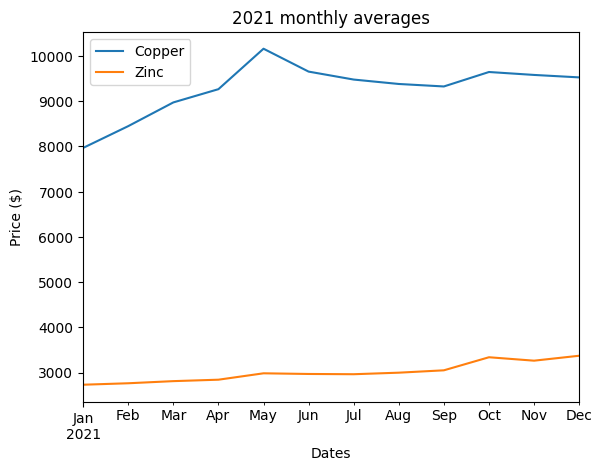

In [51]:
# Calculate monthly averages
copper_mean = df.groupby(pd.PeriodIndex(df['Dates'], freq="M"))['LMCADS03 Comdty'].mean()
zinc_mean = df.groupby(pd.PeriodIndex(df['Dates'], freq="M"))['LMZSDS03 Comdty'].mean()

# Combine into a df
df_mean = copper_mean.to_frame().merge(zinc_mean, how='left', on='Dates')

# Plot averages
df_mean.plot(title="2021 monthly averages")
plt.ylabel("Price ($)")
plt.legend(['Copper', 'Zinc'])